In [1]:
import pandas as pd

In [19]:
ex1 = pd.read_csv('Notes_ex.1.csv', sep=';')
ex1

,Observation,Note
0,1,10
1,2,7
2,3,0
3,4,5
4,5,2
5,6,7
6,7,9
7,8,7
8,9,0
9,10,8


In [20]:
import statistics as st
note_ex1 = ex1['Note']
obs_ex1 = ex1['Observation']

## Exercice 1

In [123]:
# 1 moyenne
mean1 = st.mean(note_ex1)
print(mean1)

mean2 = note_ex1.mean()
print(mean2)

mean3 = note_ex1.sum()/note_ex1.count()
print(mean3)

5.15
5.15
5.15


In [129]:
# 2 - Variance
#Variance sur la population
#(p)!!!! ==> pvariance
var1 = st.pvariance(note_ex1)
print(var1)

#Variance sur un echantillon
var2 = st.variance(note_ex1)
print(var2)

#Calcul avec Pandas (Variance)
#Variance sur un echantillon
var3 = note_ex1.var()
print(var3)

var4 = ((note_ex1 - note_ex1.mean())**2).sum()/(note_ex1.count()-1)
print(var4)

9.727500000000001
10.239473684210527
10.239473684210525
10.239473684210525


In [130]:
# 3 - Ecart type
stdev = st.pstdev(note_ex1)
print(stdev)
stdev2 = st.stdev(note_ex1)
print(stdev2)
stdev3 = note_ex1.std()
print(stdev3)

(((note_ex1 - note_ex1.mean())**2).sum()/(note_ex1.count()-1))**0.5

3.118894034750139
3.199917762101165
3.1999177621011645


3.1999177621011645

In [40]:
# 4 - Coefficient variation
from scipy.stats import variation
variation = variation(note_ex1)
print(variation)

print(stdev/mean1)

0.6056104921844929
0.6056104921844929


In [44]:
# Exemple
# entreprise - 2 filiales EN BEL et USA
# BEL = salaire net moyen de 2100 euro et ecart type 400 euro
# USA = salaire net moyen de 2600 $ et ecart de 700 $

c_bel = 400 / 2100
print("Coefficient variation BEL :", c_bel)

c_usa = 700 / 2600
print("Coefficient variation USA :", c_usa)

Coefficient variation BEL : 0.19047619047619047
Coefficient variation USA : 0.2692307692307692


In [52]:
# 5 - Mediane
mediane1 = st.median(note_ex1)
print(mediane1)

mediane2 = note_ex1.median()
print(mediane2)

5.5
5.5


In [67]:
# 6 - Mode
mode1 = st.mode(note_ex1)
print(mode1)

mode2 = st.multimode(note_ex1)
print(mode2)

StatisticsError: no unique mode; found 2 equally common values

In [68]:
mode3 = note_ex1.mode()
print(mode3)

0    2
1    7
dtype: int64


In [75]:
# Combien de fois ?
nfois = (note_ex1 == 7).sum()
print(nfois)

for i in note_ex1.mode()
    print("Nombre", i, )

4


In [82]:
from collections import Counter
Counter(note_ex1)

Counter({10: 2, 7: 4, 0: 2, 5: 2, 2: 4, 9: 1, 8: 2, 3: 2, 6: 1})

In [73]:
note_ex1.value_counts()

2     4
7     4
0     2
3     2
5     2
8     2
10    2
6     1
9     1
Name: Note, dtype: int64

<AxesSubplot:ylabel='Frequency'>

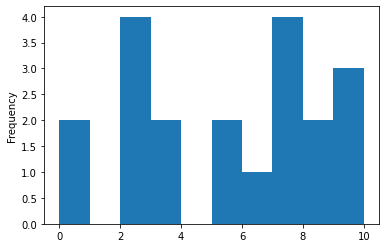

In [86]:
# Histogramme
import matplotlib.pyplot as plt

note_ex1.plot.hist()

<AxesSubplot:>

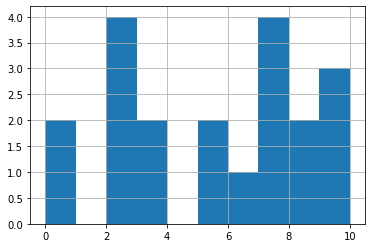

In [84]:
note_ex1.hist()

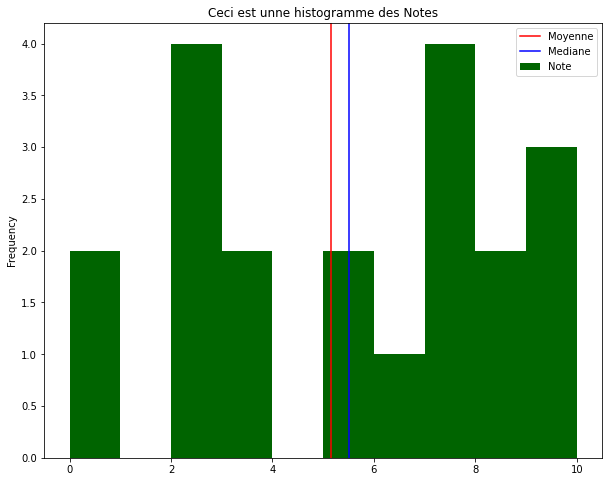

In [98]:
note_ex1.plot.hist(title='Ceci est unne histogramme des Notes', figsize=(10, 8), color='darkgreen')
plt.axvline(note_ex1.mean(), color='red', label='Moyenne')
plt.axvline(note_ex1.median(), color='blue', label='Mediane')
plt.legend()

In [111]:
import seaborn as sns
sns.displot(note_ex1, bins=10)
plt.axvline(note_ex1.mean(), color='red', label='Moyenne')
plt.axvline(note_ex1.median(), color='blue', label='Mediane')
plt.legend()

NameError: name 'note_ex1' is not defined

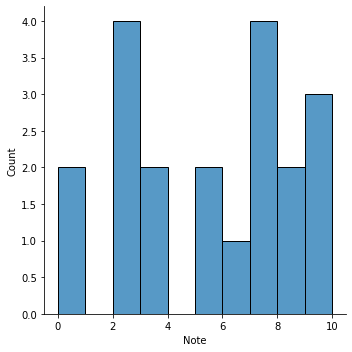

In [121]:
sns.displot(note_ex1, binwidth=1)

<AxesSubplot:xlabel='Note', ylabel='Count'>

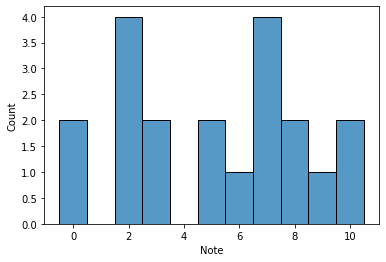

In [132]:
sns.histplot(note_ex1, discrete=True)

## Exercice 2

In [10]:
hf = pd.read_excel('HF_-_Internet.xlsx', )
hf

,Unnamed: 0,Oui,Non
0,Homme,175,114
1,Femme,461,198


In [16]:
hf = hf.rename(columns={'Unnamed: 0' : 'Sexe',
                        'Oui' : 'Internet',
                        'Non' : 'Pas Internet'})

hf = hf.set_index('Sexe')
hf

,Internet,Pas Internet
Sexe,,
Homme,175,114
Femme,461,198


In [21]:
from scipy.stats.contingency import margins

In [22]:
# Distribution
marginlg, margincol = margins(hf)
print(marginlg)
print(margincol)

[[289]
 [659]]
[[636 312]]


In [51]:
fconj_HI = hf.loc['Homme', 'Internet']
fconj_HPI = hf.loc['Homme', 'Pas Internet']
fconj_FI = hf.loc['Femme', 'Internet']
fconj_FPI = hf.loc['Femme', 'Pas Internet']

print('Fréquence conjointe')
print('Homme Internet' , fconj_HI)
print('Homme Pas Internet' , fconj_HPI)
print('Femme Internet' , fconj_FI)
print('Femme Pas Internet' , fconj_FPI)

Fréquence conjointe
Homme Internet 175
Homme Pas Internet 114
Femme Internet 461
Femme Pas Internet 198


In [29]:
# Frequence Conjointe
hf_conjointe = hf/margincol.sum()
hf_conjointe

,Internet,Pas Internet
Sexe,,
Homme,0.184599,0.120253
Femme,0.486287,0.208861


In [50]:
hf/hf.sum().sum()

,Internet,Pas Internet
Sexe,,
Homme,0.184599,0.120253
Femme,0.486287,0.208861


In [31]:
# Frequence Marginale
marginlg_conjointe, margincol_conjointe = margins(hf_conjointe)
print(marginlg_conjointe)
print(margincol_conjointe)

[[0.30485232]
 [0.69514768]]
[[0.67088608 0.32911392]]


In [49]:
hf_conjointe.sum(axis=0)

Internet        0.670886
Pas Internet    0.329114
dtype: float64

In [45]:
hf_conjointe.sum(axis=1)

Sexe
Homme    0.304852
Femme    0.695148
dtype: float64

In [ ]:
HF_conjointe = HF/HF.sum().sum()
print(HF_conjointe.sum(axis=0))
print(HF_conjointe.sum(axis=1))

In [53]:
# Frequence Conditionnel
hf

,Internet,Pas Internet
Sexe,,
Homme,175,114
Femme,461,198


In [56]:
hf_cond = hf/hf.sum(axis=0)
hf_cond

,Internet,Pas Internet
Sexe,,
Homme,0.275157,0.365385
Femme,0.724843,0.634615


In [60]:
hf_cond.sum(axis=0)

Internet        1.0
Pas Internet    1.0
dtype: float64

In [58]:
hf_cond.sum(axis=1)

Sexe
Homme    0.640542
Femme    1.359458
dtype: float64

In [61]:
hf/margincol

,Internet,Pas Internet
Sexe,,
Homme,0.275157,0.365385
Femme,0.724843,0.634615


In [62]:
hf/marginlg

,Internet,Pas Internet
Sexe,,
Homme,0.605536,0.394464
Femme,0.699545,0.300455


## Exercice 3

In [73]:
import numpy as np
df = pd.DataFrame(np.random.rand(50,2)*10, columns=['vitesse', 'poids'])
df['category'] = np.random.choice(['Ford', 'BWM', 'Honda', 'Merciedes', 'Renauld'], size=50)
df['color'] = np.random.choice(['blue', 'rouge', 'noir'], size=50)
df.head()

,vitesse,poids,category,color
0,4.613931,0.626761,Honda,blue
1,3.095497,7.119046,Ford,rouge
2,4.054636,3.821548,Renauld,rouge
3,7.957545,1.414043,Merciedes,noir
4,7.923523,3.148586,Renauld,noir


In [74]:
# group by / pivot_table / crosstab
# Compter nos effectifs
pd.crosstab(df['category'], df['color'])

color,blue,noir,rouge
category,,,
BWM,3,2,1
Ford,1,3,10
Honda,5,3,6
Merciedes,1,1,2
Renauld,3,2,7


In [75]:
# Distribution marginale
pd.crosstab(df['category'], df['color'], margins=True)

color,blue,noir,rouge,All
category,,,,
BWM,3,2,1,6
Ford,1,3,10,14
Honda,5,3,6,14
Merciedes,1,1,2,4
Renauld,3,2,7,12
All,13,11,26,50


In [79]:
# Frequence marginale
pd.crosstab(df['category'], df['color'], margins=True, normalize=True)

color,blue,noir,rouge,All
category,,,,
BWM,0.06,0.04,0.02,0.12
Ford,0.02,0.06,0.20,0.28
Honda,0.10,0.06,0.12,0.28
Merciedes,0.02,0.02,0.04,0.08
Renauld,0.06,0.04,0.14,0.24
All,0.26,0.22,0.52,1.00


In [81]:
# Normalize = total True - index - columns
pd.crosstab(df['category'], df['color'], margins=True, normalize='index')

color,blue,noir,rouge
category,,,
BWM,0.500000,0.333333,0.166667
Ford,0.071429,0.214286,0.714286
Honda,0.357143,0.214286,0.428571
Merciedes,0.250000,0.250000,0.500000
Renauld,0.250000,0.166667,0.583333
All,0.260000,0.220000,0.520000


In [82]:
df.head()

,vitesse,poids,category,color
0,4.613931,0.626761,Honda,blue
1,3.095497,7.119046,Ford,rouge
2,4.054636,3.821548,Renauld,rouge
3,7.957545,1.414043,Merciedes,noir
4,7.923523,3.148586,Renauld,noir


In [87]:
pd.crosstab(df['category'], df['color'], values=df['vitesse'], aggfunc=np.max)

color,blue,noir,rouge
category,,,
BWM,9.291975,7.597542,5.600247
Ford,0.009884,7.805988,9.033058
Honda,6.834875,9.772678,8.440230
Merciedes,9.662593,7.957545,4.948697
Renauld,8.936570,9.220255,7.100373


In [91]:
df[(df['category'] == "BWM") & (df['color'] == 'blue')]['vitesse']

5     6.016224
8     9.291975
44    5.813421
Name: vitesse, dtype: float64

In [97]:
# Pivot table
pd.pivot_table(df, index='category', columns='color', values='vitesse', aggfunc='mean')



color,blue,noir,rouge
category,,,
BWM,7.040540,6.591008,5.600247
Ford,0.009884,5.924323,4.242134
Honda,4.658754,7.163123,4.281851
Merciedes,9.662593,7.957545,4.610057
Renauld,7.509220,8.571889,4.327062


In [98]:
pd.pivot_table(df, index='category', columns='color', values='vitesse', margins=True)

color,blue,noir,rouge,All
category,,,,
BWM,7.040540,6.591008,5.600247,6.650647
Ford,0.009884,5.924323,4.242134,4.300300
Honda,4.658754,7.163123,4.281851,5.033875
Merciedes,9.662593,7.957545,4.610057,6.710063
Renauld,7.509220,8.571889,4.327062,5.830073
All,5.893502,7.049607,4.354702,5.347669


In [109]:
pd.pivot_table(df, index='category', columns='color', values='vitesse', margins=True, aggfunc=['mean', 'sum'])

mean                                      sum             \
color          blue      noir     rouge       All       blue       noir   
category                                                                  
BWM        7.040540  6.591008  5.600247  6.650647  21.121619  13.182015   
Ford       0.009884  5.924323  4.242134  4.300300   0.009884  17.772970   
Honda      4.658754  7.163123  4.281851  5.033875  23.293770  21.489369   
Merciedes  9.662593  7.957545  4.610057  6.710063   9.662593   7.957545   
Renauld    7.509220  8.571889  4.327062  5.830073  22.527659  17.143778   
All        5.893502  7.049607  4.354702  5.347669  76.615526  77.545677   

                                   
color           rouge         All  
category                           
BWM          5.600247   39.903881  
Ford        42.421340   60.204194  
Honda       25.691107   70.474246  
Merciedes    9.220115   26.840253  
Renauld     30.289436   69.960874  
All        113.222245  267.383448

In [105]:
df.groupby(['category', 'color'])['vitesse'].agg(['mean', 'std'])

mean       std
category  color                    
BWM       blue   7.040540  1.952435
          noir   6.591008  1.423454
          rouge  5.600247       NaN
Ford      blue   0.009884       NaN
          noir   5.924323  2.287609
          rouge  4.242134  3.357104
Honda     blue   4.658754  2.337424
          noir   7.163123  2.301750
          rouge  4.281851  3.223446
Merciedes blue   9.662593       NaN
          noir   7.957545       NaN
          rouge  4.610057  0.478909
Renauld   blue   7.509220  1.999839
          noir   8.571889  0.916928
          rouge  4.327062  2.005261

In [112]:
import seaborn as sns

<AxesSubplot:xlabel='poids', ylabel='vitesse'>

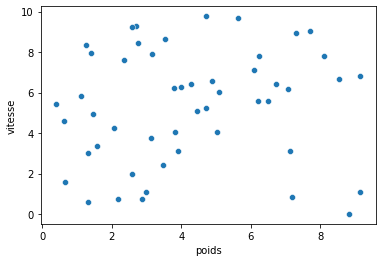

In [114]:
# 
sns.scatterplot(data=df, x='poids', y='vitesse')

<AxesSubplot:xlabel='poids', ylabel='vitesse'>

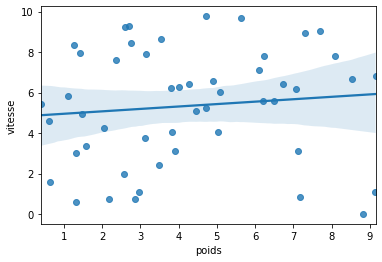

In [117]:
sns.regplot(data=df, x='poids', y='vitesse')

In [116]:
df[['poids', 'vitesse']].corr()

,poids,vitesse
poids,1.000000,0.107047
vitesse,0.107047,1.000000


<AxesSubplot:>

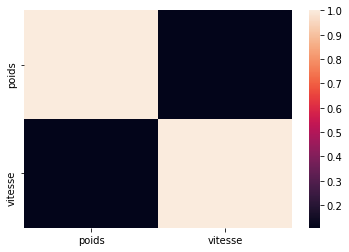

In [118]:
sns.heatmap(df[['poids', 'vitesse']].corr())